In [1]:
import json
import requests
import pickle

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('creds.txt', 'r') as f:
    email, name, pw, pw2, token = f.read().split('\n')

In [3]:
# Get state codes: https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test
# Get county codes: https://aqs.epa.gov/data/api/list/sitesByCounty?email=test@aqs.api&key=test&state=37
# Get site codes: https://aqs.epa.gov/data/api/list/sitesByCounty?email=test@aqs.api&key=test&state=37&county=183

keys = {'pm2.5' : 88101,
       'co' : 42101,
       'so' : 42401,
       'no2' : 42602,
       'o3' : 44201}

def get_parameter(state = 24, county = 510, param = keys['pm2.5'], bdate = (2021, 1, 1), edate = (2021, 12, 31), save = True, outpath = 'data/'):
    bdate = '{:4d}{:02d}{:02d}'.format(bdate[0], bdate[1], bdate[2])
    edate = '{:4d}{:02d}{:02d}'.format(edate[0], edate[1], edate[2])
        
    md_pm25 = 'https://aqs.epa.gov/data/api/dailyData/byCounty?email={}&key={}&param={}&bdate={}&edate={}&state=24&county=510'.format(email, pw, param, bdate, edate)
    print(md_pm25)
    response = requests.get(md_pm25)
    data = response.json()
            
    data = pd.json_normalize(data['Data'])
    data['date_local'] = pd.to_datetime(data['date_local'], format="%Y-%m-%d")
    data.sort_values(by='date_local', inplace = True)
    data['site_number'] = [int(data['site_number'][i]) for i in range(len(data))]
    
    if save:
        data.to_csv('data/epa/{}_{}_{}.csv'.format(state, county, param))
    
    return data

In [4]:
#pm25 = get_parameter(param = keys['pm2.5'])
data = get_parameter(param = keys['no2'])

https://aqs.epa.gov/data/api/dailyData/byCounty?email=sarsene1@jhu.edu&key=cobaltwolf97&param=42602&bdate=20210101&edate=20211231&state=24&county=510


In [5]:
data.keys()

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'date_local',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'arithmetic_mean',
       'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
       'local_site_name', 'site_address', 'state', 'county', 'city',
       'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [6]:
print(set(data['latitude']))
print(set(data['longitude']))

{39.297733}
{-76.604603}


In [7]:
print(set(data['site_number']))

{40}


Text(0, 0.5, 'AQI')

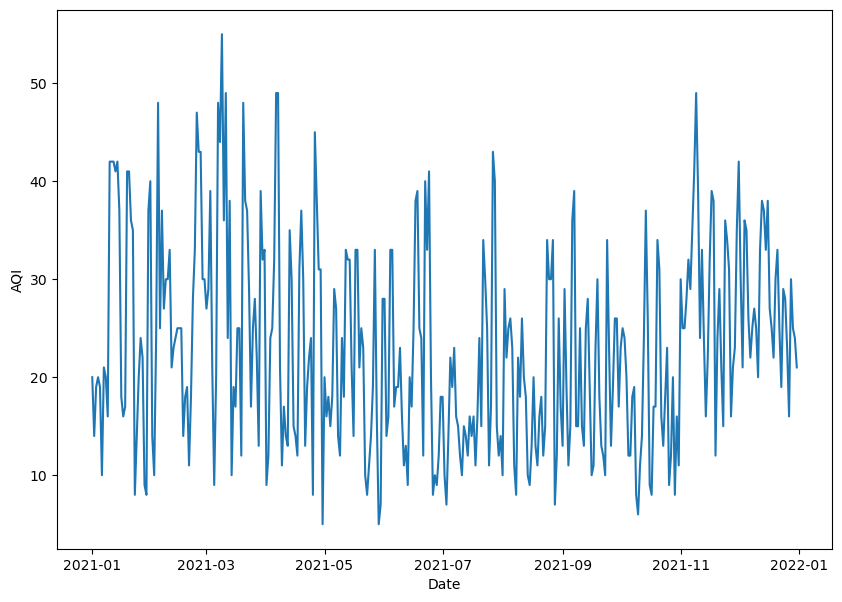

In [8]:
plt.figure(figsize=(10,7))

plt.plot(data[data['site_number'] == 40]['date_local'], data[data['site_number'] == 40]['aqi'])

plt.xlabel('Date')
plt.ylabel('AQI')

Text(0, 0.5, 'NO2 $[\\mu g/m^3]$')

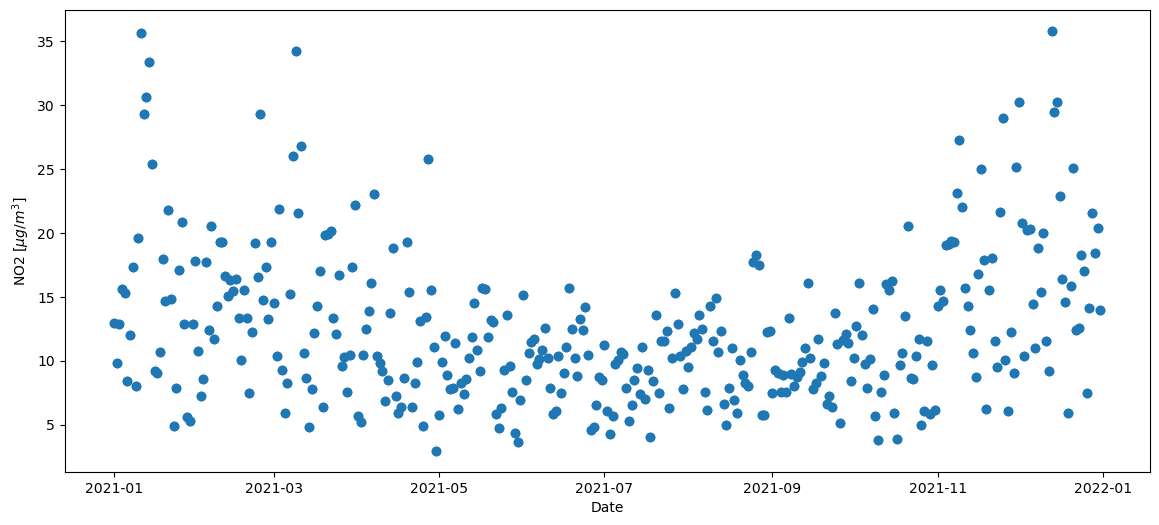

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))


plt.scatter(data[data['site_number'] == 40]['date_local'], data[data['site_number'] == 40]['arithmetic_mean'])

plt.xlabel('Date')
plt.ylabel(r'NO2 $[\mu g/m^3]$')

In [10]:
print(len(data))

730
